In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
# Reading the csv data 
df = pd.read_csv(r"C:\Users\deepe\Downloads\healthcare_drug_registration.csv")
df

,Drug_ID,Drug_Name,Manufacturer,Active_Ingredients,Strength,Country,Approval_Date,Status
0,1001,Panacure,AstraZeneca,Favipiravir,200mg,Germany,2024-12-24,Rejected
1,1002,Zedafil,Roche,Lisinopril,5mg,India,2022-09-25,Rejected
2,1003,Ibucare,Pfizer,NaN,500mg,USA,2022-05-14,Approved
3,1004,Xanpril,Roche,Favipiravir,500mg,UK,2023-06-07,Approved
4,1005,Ventomax,Lupin,Ibuprofen,400mg,Germany,2023-04-21,Rejected
...,...,...,...,...,...,...,...,...
95,1096,Azitron,Sun Pharma,Lisinopril,100mg,Australia,2024-12-17,Approved
96,1097,Azitron,GSK,Azithromycin,100mg,Canada,2022-12-27,Pending
97,1098,Zedafil,Cipla,Lisinopril,200mg,Australia,2024-07-13,Pending
98,1099,Ventomax,Moderna,Lisinopril,500mg,UK,2023-04-21,Pending


In [10]:
df.describe(include = 'all')

,Drug_ID,Drug_Name,Manufacturer,Active_Ingredients,Strength,Country,Approval_Date,Status
count,100.000000,96,100,92,100,100,91,100
unique,NaN,9,9,9,7,6,87,3
top,NaN,Ventomax,Pfizer,Sildenafil,500mg,USA,2023-11-17,Rejected
freq,NaN,15,14,17,23,19,2,34
mean,1050.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,29.011492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1001.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1025.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1050.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1075.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

In [11]:
df['Drug_Name'] = df['Drug_Name'].replace('',pd.NA)

In [13]:
df['Active_Ingredients'] = df['Active_Ingredients'].replace('',pd.NA)

In [15]:
df.tail()

,Drug_ID,Drug_Name,Manufacturer,Active_Ingredients,Strength,Country,Approval_Date,Status
95,1096,Azitron,Sun Pharma,Lisinopril,100mg,Australia,2024-12-17,Approved
96,1097,Azitron,GSK,Azithromycin,100mg,Canada,2022-12-27,Pending
97,1098,Zedafil,Cipla,Lisinopril,200mg,Australia,2024-07-13,Pending
98,1099,Ventomax,Moderna,Lisinopril,500mg,UK,2023-04-21,Pending
99,1100,Ventomax,AstraZeneca,Amoxicillin,250mg,Canada,2022-12-15,Pending


In [16]:
df['Approval_Date'] = pd.to_datetime(df['Approval_Date'], errors='coerce')

Filling the Mising values 

In [17]:
df['Drug_Name'].fillna("Unknown", inplace=True)
df['Active_Ingredients'].fillna("Not Specified", inplace=True)
df['Approval_Date'].fillna(method='ffill', inplace=True)

In [19]:
df

,Drug_ID,Drug_Name,Manufacturer,Active_Ingredients,Strength,Country,Approval_Date,Status
0,1001,Panacure,AstraZeneca,Favipiravir,200mg,Germany,2024-12-24,Rejected
1,1002,Zedafil,Roche,Lisinopril,5mg,India,2022-09-25,Rejected
2,1003,Ibucare,Pfizer,Not Specified,500mg,USA,2022-05-14,Approved
3,1004,Xanpril,Roche,Favipiravir,500mg,UK,2023-06-07,Approved
4,1005,Ventomax,Lupin,Ibuprofen,400mg,Germany,2023-04-21,Rejected
...,...,...,...,...,...,...,...,...
95,1096,Azitron,Sun Pharma,Lisinopril,100mg,Australia,2024-12-17,Approved
96,1097,Azitron,GSK,Azithromycin,100mg,Canada,2022-12-27,Pending
97,1098,Zedafil,Cipla,Lisinopril,200mg,Australia,2024-07-13,Pending
98,1099,Ventomax,Moderna,Lisinopril,500mg,UK,2023-04-21,Pending


In [20]:
# Standardize strength units
df['Strength'] = df['Strength'].str.lower().str.strip()

In [21]:
df

,Drug_ID,Drug_Name,Manufacturer,Active_Ingredients,Strength,Country,Approval_Date,Status
0,1001,Panacure,AstraZeneca,Favipiravir,200mg,Germany,2024-12-24,Rejected
1,1002,Zedafil,Roche,Lisinopril,5mg,India,2022-09-25,Rejected
2,1003,Ibucare,Pfizer,Not Specified,500mg,USA,2022-05-14,Approved
3,1004,Xanpril,Roche,Favipiravir,500mg,UK,2023-06-07,Approved
4,1005,Ventomax,Lupin,Ibuprofen,400mg,Germany,2023-04-21,Rejected
...,...,...,...,...,...,...,...,...
95,1096,Azitron,Sun Pharma,Lisinopril,100mg,Australia,2024-12-17,Approved
96,1097,Azitron,GSK,Azithromycin,100mg,Canada,2022-12-27,Pending
97,1098,Zedafil,Cipla,Lisinopril,200mg,Australia,2024-07-13,Pending
98,1099,Ventomax,Moderna,Lisinopril,500mg,UK,2023-04-21,Pending


In [23]:
df['Manufacturer'].value_counts() # checking the count of the Manufacturer

Manufacturer
Pfizer         14
Sun Pharma     14
Roche          13
AstraZeneca    12
Novartis       11
Lupin          10
Moderna        10
Cipla           9
GSK             7
Name: count, dtype: int64

In [25]:
df['Status'].value_counts()

Status
Rejected    34
Approved    33
Pending     33
Name: count, dtype: int64

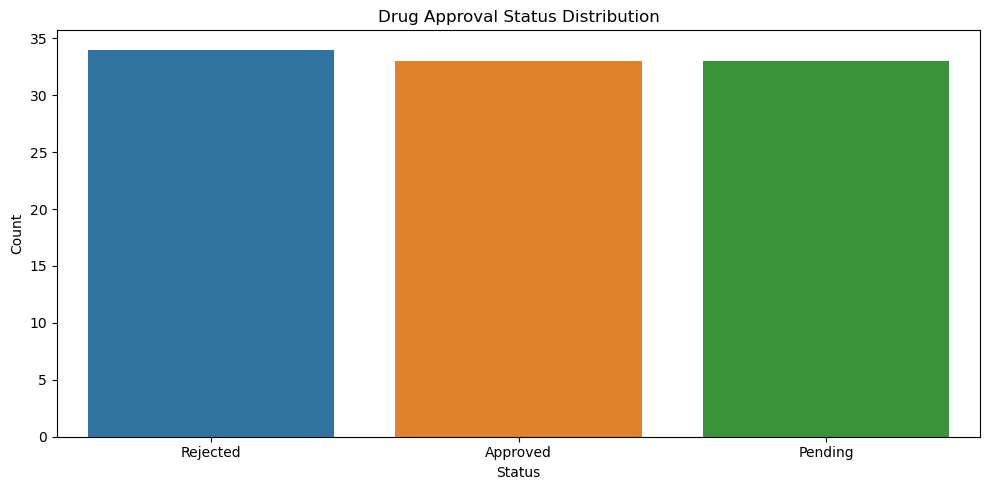

In [26]:
# Visualizations
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Status', order=df['Status'].value_counts().index)
plt.title("Drug Approval Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

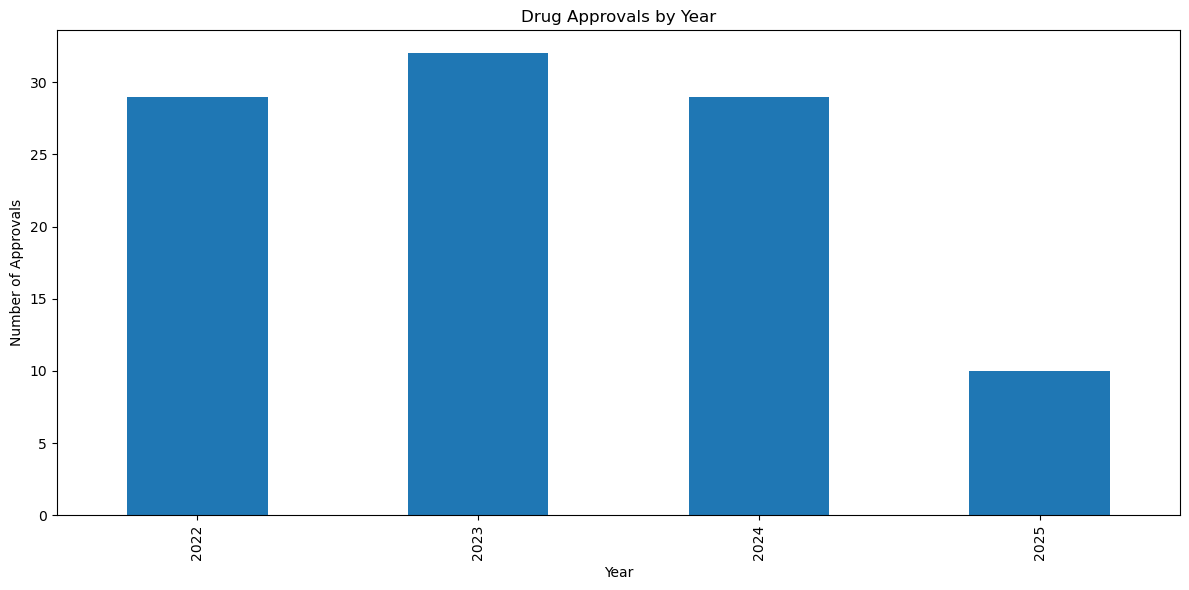

In [27]:
plt.figure(figsize=(12, 6))
df['Approval_Date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title("Drug Approvals by Year")
plt.xlabel("Year")
plt.ylabel("Number of Approvals")
plt.tight_layout()
plt.show()